In [123]:
import pandas as pd
import json
from datetime import date
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pylab as plt
%matplotlib inline

In [82]:
with open('testData.json') as file:
    data = json.load(file)

In [83]:
columns = [x['name'] for x in data[0]['columnHeaders']]
rows = [x for x in data[0]['rows']]
df = pd.DataFrame(rows, columns = columns)

In [84]:
df['ga:date'] = pd.to_datetime(df['ga:date'], format = '%Y-%m-%d')
df['ga:date'] = pd.DatetimeIndex(df['ga:date']).normalize()

In [85]:
df.head()

,ga:date,ga:dimension5,ga:dimension6,ga:sessions,ga:transactionRevenue
0,2015-12-01,$0-29,Monday,17,62.74
1,2015-12-01,$0-29,Sunday,1,0.00
2,2015-12-01,$0-29,Thursday,1,0.00
3,2015-12-01,$0-29,Tuesday,2298,16189.79
4,2015-12-01,$0-29,Wednesday,56,171.55


In [86]:
del df['ga:dimension6']

In [87]:
df['ga:sessions'] = pd.to_numeric(df['ga:sessions'])
df['ga:transactionRevenue'] = pd.to_numeric(df['ga:transactionRevenue'])

In [88]:
type(df['ga:sessions'][0])

numpy.int64

In [89]:
df = df.groupby(['ga:dimension5', 'ga:date']).sum()

In [90]:
df.head()

ga:sessions  ga:transactionRevenue
ga:dimension5 ga:date                                       
$0-29         2015-12-01         2373               16424.08
              2015-12-02         1335               14227.60
              2015-12-03         1247                6655.17
              2015-12-04         1111                5625.04
              2015-12-05          986                5508.21

In [91]:
s = df['ga:sessions']

In [92]:
r = df['ga:transactionRevenue']

In [108]:
r.index.values

array([(u'$0-29', Timestamp('2015-12-01 00:00:00')),
       (u'$0-29', Timestamp('2015-12-02 00:00:00')),
       (u'$0-29', Timestamp('2015-12-03 00:00:00')), ...,
       (u'$90-99', Timestamp('2016-11-18 00:00:00')),
       (u'$90-99', Timestamp('2016-11-19 00:00:00')),
       (u'$90-99', Timestamp('2016-11-20 00:00:00'))], dtype=object)

In [115]:
idx = pd.Series([x[0] for x in r.index.values]).unique()

In [116]:
print idx

[u'$0-29' u'$100-119' u'$120-139' u'$140-159' u'$160-179' u'$180-199'
 u'$200-224' u'$225-249' u'$250-274' u'$275-299' u'$30-39' u'$300-324'
 u'$325-349' u'$350-374' u'$375-399' u'$40-49' u'$400-424' u'$425-449'
 u'$450-474' u'$475-499' u'$50-59' u'$500-524' u'$525-549' u'$550-574'
 u'$575-599' u'$60-69' u'$600 ' u'$600+' u'$70-79' u'$80-89' u'$90-99']


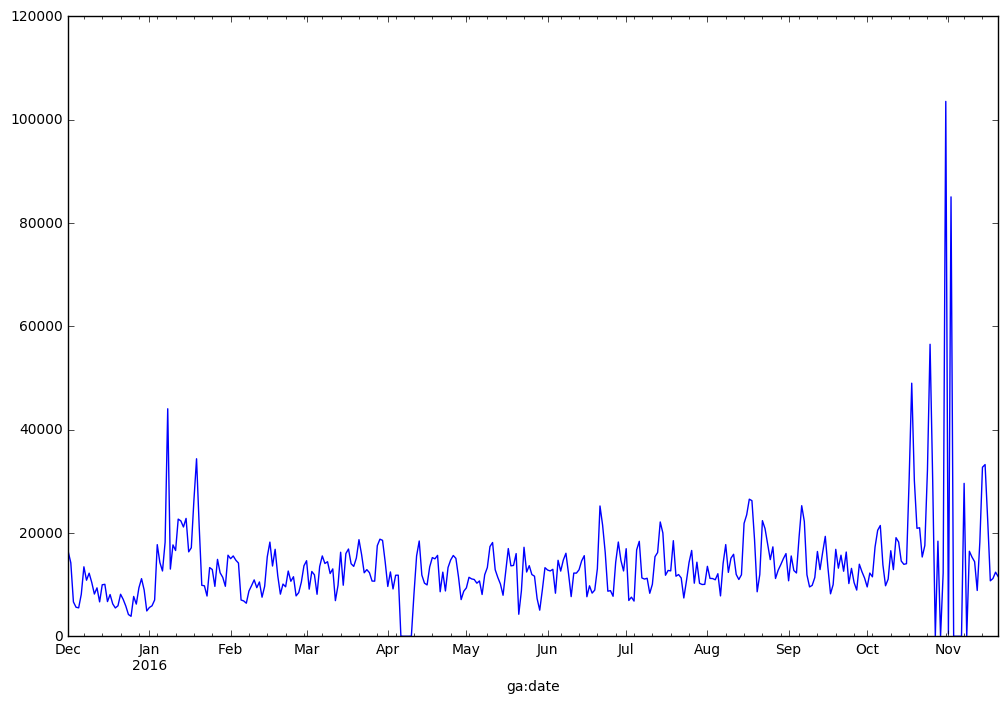

In [120]:
r['$0-29'].plot(figsize=(12, 8))


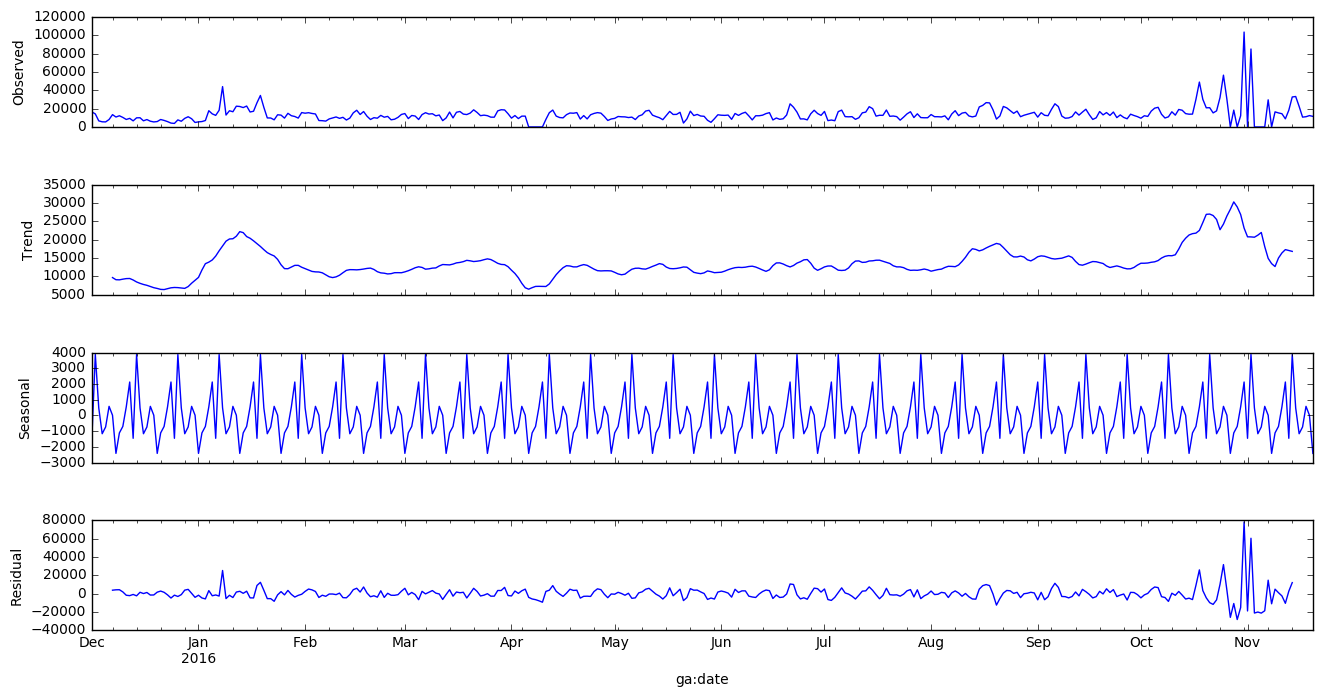

In [124]:
decomposition = seasonal_decompose(r['$0-29'], freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)